# 3.08 Activity 1

Keep working on the `bank` database.

- With `pd.read_sql_query`, you can also use the database url connection string instead of the engine. Try it.
- Also, `pd.read_sql_table` will accept a table name and will retrieve the whole table. The `pd.read_sql` is a convenient wrapper around both functions. Explore those functions on the table `district`.

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)
# data = pd.read_sql_query('SELECT * FROM loan', engine)
# data.head()

In [3]:
query = '''select t.type, t.operation, t.amount as t_amount, t.balance, t.k_symbol, l.amount as l_amount, l.duration, l.payments, l.status
from trans t
left join loan l
on t.account_id = l.account_id;'''

data = pd.read_sql_query(query, engine)
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,700.0,700.0,,NaN,NaN,NaN,None
1,PRIJEM,VKLAD,900.0,900.0,,NaN,NaN,NaN,None
2,PRIJEM,VKLAD,1000.0,1000.0,,NaN,NaN,NaN,None
3,PRIJEM,VKLAD,600.0,600.0,,NaN,NaN,NaN,None
4,PRIJEM,VKLAD,400.0,400.0,,NaN,NaN,NaN,None


In [5]:
pd.read_sql_table('district', engine)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [7]:
pd.read_sql('district', engine)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


# 3.08 Activity 2

Explore values in columns `TYPE` and `OPERATION`. How many different loans of each type and operation are there? How many loans for each combination? (You may want to check out `pandas.crosstab` function.)


In [9]:
data.type.value_counts()

VYDAJ     513977
PRIJEM    339950
VYBER      14092
Name: type, dtype: int64

In [10]:
data.operation.value_counts()

VYBER             391903
                  183112
PREVOD NA UCET    129484
VKLAD             115624
PREVOD Z UCTU      41214
VYBER KARTOU        6682
Name: operation, dtype: int64

In [15]:
pd.crosstab(data.type,data.operation)

operation,,PREVOD NA UCET,PREVOD Z UCTU,VKLAD,VYBER,VYBER KARTOU
type,,,,,,
PRIJEM,183112,0,41214,115624,0,0
VYBER,0,0,0,0,14092,0
VYDAJ,0,129484,0,0,377811,6682


In [16]:
pd.crosstab(data.operation,data.type)

type,PRIJEM,VYBER,VYDAJ
operation,,,
,183112,0,0
PREVOD NA UCET,0,0,129484
PREVOD Z UCTU,41214,0,0
VKLAD,115624,0,0
VYBER,0,14092,377811
VYBER KARTOU,0,0,6682


# 3.08 Activity 3

- Explore visually the transformed numerical columns. What do you see?
- Another typical transformation for numerical columns is to take the logarithm. Apply the log transform to columns **balance** and **t_ammount** and compare the results with the Normalized data.


In [ ]:
# we have to clean data

In [33]:
data = data[data['duration'].isna() == False]

In [34]:
data.isnull().sum()

type         0
operation    0
t_amount     0
balance      0
k_symbol     0
l_amount     0
duration     0
payments     0
status       0
dtype: int64

In [31]:
data['operation'].value_counts()
def cleanOperation(x):
    x = x.lower()
    if 'vyber' in x:
        return "vyber"
    elif 'prevod' in x:
        return "prevod"
    elif 'vklad' in x:
        return 'vklad'
    else:
        return 'unknown'

In [32]:
data['operation'] = list(map(cleanOperation, data['operation']))

In [27]:
data['k_symbol'].value_counts()
data['k_symbol'].value_counts().index
def cleankSymbol(x):
    if x in ['', ' ']:
        return 'unknown'
    else:
        return x

data['k_symbol'] = list(map(cleankSymbol, data['k_symbol']))
data = data[~data['k_symbol'].isin(['POJISTNE', 'SANKC. UROK', 'UVER'])]

In [28]:
def clean_type(x):
    if 'PRI' in x:
        return 'PRIJEM'
    else:
        return x
data['type'] = list(map(clean_type, data['type']))

In [35]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
X = data.select_dtypes(include = np.number)

# Normalizing data
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [41]:
x.columns = X.columns
x

,t_amount,balance,l_amount,duration,payments
0,0.438261,0.446096,0.779661,0.000235,0.032486
1,0.018872,0.018872,0.996191,0.000226,0.083016
2,0.050028,0.050028,0.997108,0.001637,0.027697
3,0.030234,0.030234,0.995634,0.000518,0.082970
4,0.021394,0.021394,0.996090,0.000285,0.083007
...,...,...,...,...,...
145331,0.000253,0.063358,0.997852,0.000223,0.016631
145332,0.000426,0.096119,0.995232,0.000137,0.016587
145333,0.000481,0.113176,0.993437,0.000219,0.016557
145334,0.000706,0.152565,0.988156,0.000156,0.016469


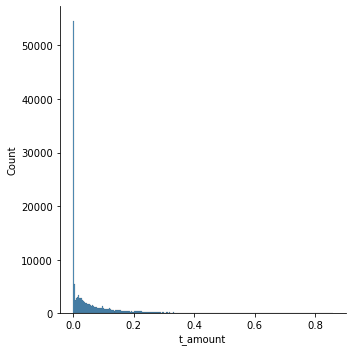

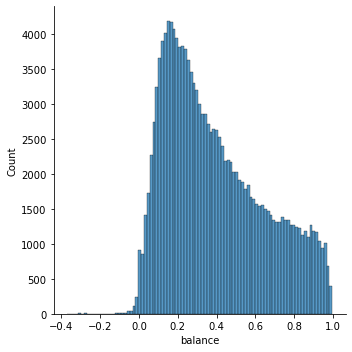

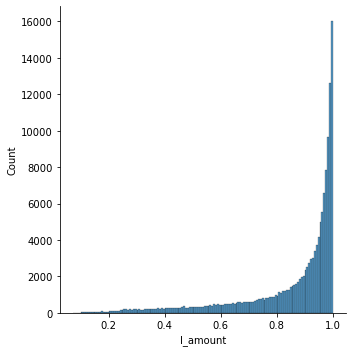

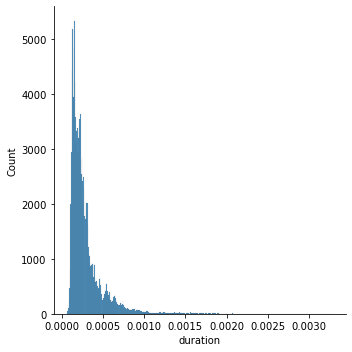

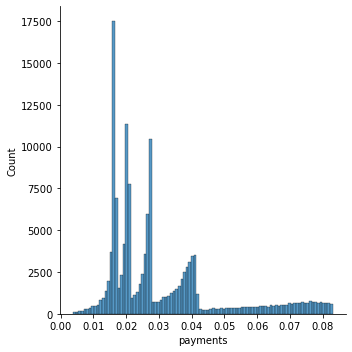

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in x.columns:
    sns.displot(x[i])
    plt.show()

In [ ]:
Apply the log transform to columns balance and t_ammount

In [73]:
def log_negatives(x):
    if x > 0:
        return x
    else:
        x = np.log(x)
        return x
data1 = list(map(log_negatives,x.balance))
data2 = list(map(log_negatives,x.t_amount))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


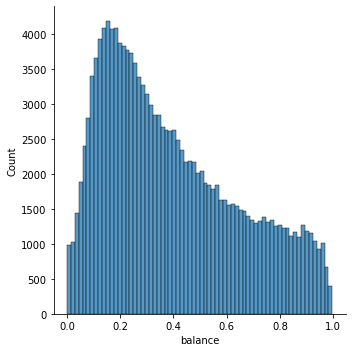

In [71]:
sns.displot(x['balance'].apply(log_negatives))
plt.show()

ValueError: autodetected range of [-inf, 0.857956477855066] is not finite

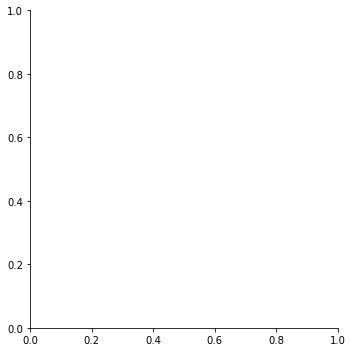

In [75]:
sns.displot(x['t_amount'].apply(log_negatives))
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

In [59]:
import sklearn
sklearn.__version__

'0.24.0'

In [60]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix